In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Principal components analysis (PCA)

Week 8| Lesson 4.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Explain the intuition and the algorithm of PCA
- Explain the use cases of PCA
- Perform PCA on numeric feature data

## Review - covariance and variance

$$
\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}
$$

$$cov(X,X) = \sigma^2(X)$$



# Principal Components Analysis (PCA)

---

PCA is a very popular technique for performing "dimensionality reduction" on your data. 

Dimensionality reduction is the process of combining or collapsing your existing features (columns in X) into new features that not only retain the original information (or as much of it as we can) but also ideally reduce noise.

**Reminder**:

PCA is a pre-processing step.  It is not a model.

## What is PCA?

---

PCA finds the linear combinations of your current predictor variables that will create new "principal components" that explain, in order, the maximum possible amount of variance in your predictors.

Intuitively, PCA **transforms the coordinate system so that the axes become the most concise, informative descriptors of our data as a whole.**

The new axes are the principal components.


### The Process of PCA 

---

Say we have a matrix $X$ of predictor variables. PCA will give us the ability to transform our $X$ matrix into a new matrix $Z$. 

We will derive a **weighting matrix** $W$, made up of the eigenvectors of the covariance matrix of $X$, that allows us to perform the transformation.

Each successive dimension (column) in $Z$ will be rank-ordered according to variance in its values!


**There are 3 assumptions that PCA makes:**
1. Linearity: Our data does not hold nonlinear relationships.
2. Large variances define importance: our dimensions are constructed to maximize remaining variance.
3. Principal components are orthogonal: each component (columns of $Z$) is completely un-correlated with the others.

![](./assets/images/pca_coordinate_transformation.png)

### "Principal Components"

---

What is a principal component? **Principal components are the vectors that define the new coordinate system for your data.** Transforming your original data columns onto the principal component axes constructs new variables that are optimized to explain as much variance as possible and to be independent (orthogonal).

Creating these variables is a well-defined mathematical process, but in essence **each component is created as a weighted sum (linear combination) of your original columns, such that all components are orthogonal (perpendicular) to each other**.

**Independent exercise: PRINCIPAL COMPONENT TRANSFORMATION OF DATA: PC1 VS PC2**

[Try this out at setosa.io – it's a nice way to explore the intuition](http://setosa.io/ev/principal-component-analysis/)

---

![](./assets/images/setosa_pc1.png) 

### Why would we want to do PCA?

---

- We can reduce the number of dimensions (remove bottom number of components) and lose the least possible amount of variance information in our data.
- Since we are assuming our variables are interrelated (at least in the sense that they together explain a dependent variable), the information of interest should exist along directions with largest variance.
- The directions of largest variance should have the highest Signal to Noise ratio.
- Correlated predictor variables (also referred to as "redundancy" of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.

---

[Good paper on PCA](http://arxiv.org/pdf/1404.1100.pdf)

[Nice site on performing PCA](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda)

## Recall:  Manual Calculation for PCA 

---

**MANUAL PCA STEPS:**

1. Standardize data: centering is required, but full normalization is nice for visuals later.
2. Calculate eigenvectors and eigenvalues from correlation or covariance matrix.
3. Sort eigenvalues and choose eigenvectors that correspond to the largest eigenvalues. The number you choose is up to you, but we will take 2 for the sake of visualization here.
4. Construct the projection weighting matrix $W$ from the eigenvectors.
5. Transform the original dataset $X$ with $W$ to obtain the new 2-dimensional transformed matrix $Z$.



## Now with sklearn!

We are going to be looking at the results of the 2017 NFL Combine.

We've selected only those players who completed the 40 yd dash, vertical jump, bench press, broad jump, 3 cone run, shuttle run.

[Reference](https://youtu.be/digjjnc3Sec)

In [2]:
combine = pd.read_csv("./assets/datasets/combine_short.csv")
combine.head()

,Pos,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle
0,C,5.15,27.0,26.0,107.0,7.89,4.81
1,C,5.54,26.5,19.0,97.0,7.60,4.47
2,C,5.51,25.5,21.0,100.0,8.09,4.84
3,CB,4.44,37.0,11.0,128.0,6.68,4.18
4,CB,4.43,34.5,16.0,132.0,6.81,4.14


Let's look at the correlation

In [3]:
combine.iloc[:,1:].corr()

,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle
40YD,1.000000,-0.695207,0.610425,-0.825469,0.847214,0.761475
Vertical,-0.695207,1.000000,-0.373948,0.762874,-0.713399,-0.662676
BenchReps,0.610425,-0.373948,1.000000,-0.497468,0.660252,0.571459
Broad Jump,-0.825469,0.762874,-0.497468,1.000000,-0.801617,-0.774885
3Cone,0.847214,-0.713399,0.660252,-0.801617,1.000000,0.874948
Shuttle,0.761475,-0.662676,0.571459,-0.774885,0.874948,1.000000


Overall magnitudes of correlations are high, which intuitively makes sense!  But general jumps are negatively correlated with runs / lifting.

## Standardizing our features

In [4]:
from sklearn.preprocessing import StandardScaler
comb_n = StandardScaler().fit_transform(combine.iloc[:,1:])

First, we're going to convert the results so that higher numbers denote better results.

In [5]:
comb_n[:,[0,4,5]] *= -1

## Using sklearn, we're going to perform PCA on the features

In [6]:
from sklearn.decomposition import PCA
pca = PCA().fit(comb_n)

## Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

$$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

---

## We can calculate this in sklearn

In [7]:
pca.explained_variance_ratio_

array([ 0.75282931,  0.11243699,  0.05074286,  0.04079264,  0.02734721,
        0.01585099])

>Check: what do these numbers mean?

## Plotting the variance of components

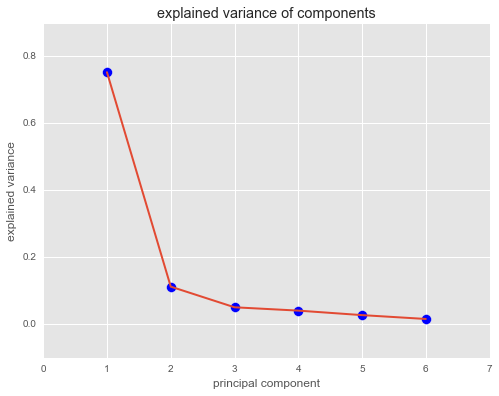

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,7), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, 7), pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

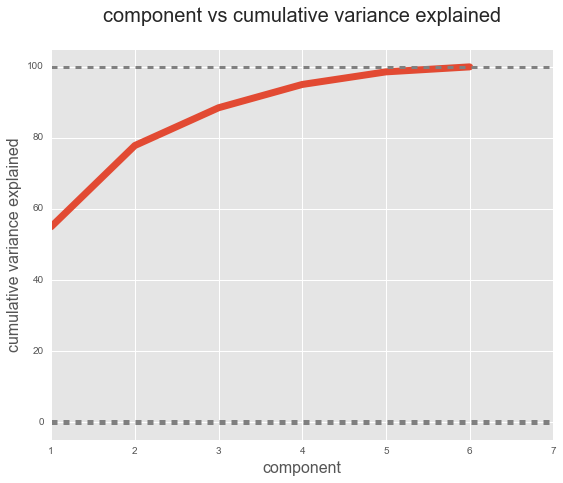

In [22]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)*100
plt.figure(figsize=(9,7))
component_number = range(1,7)
plt.plot(component_number, cum_var_exp, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,7])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)  
ax.set_title('component vs cumulative variance explained\n', fontsize=20);


## Let's look at the first two components to see if we can learn anything

In [10]:
pca1_evec = pca.components_[0]
for weight, event in zip(pca1_evec, combine.iloc[:,1:].columns):
    print event, weight

40YD -0.431659911225
Vertical -0.382804899834
BenchReps 0.328341852634
Broad Jump -0.425712381832
3Cone -0.445691961714
Shuttle -0.423614684273


This is more or less spread out among the features, but sign reversed for bench reps.  So perhaps this is a measure of overall (lack) of athleticism (and lower lower-body strength!), but strong upper-body.

In [11]:
pca1_evec = pca.components_[1]
for weight, event in zip(pca1_evec, combine.iloc[:,1:].columns):
    print event, weight

40YD -0.00188023407271
Vertical 0.50575501858
BenchReps 0.819661441566
Broad Jump 0.25846157331
3Cone -0.0745645478585
Shuttle -0.00109107094914


In contrast, this is heavily weighted towards bench reps, vertical jump.  Perhaps this measures upper body strength / explosiveness.

## Given that 86% of the variance is described in two PCs, we possibly can argue that it's only really two skill sets being measured...

In [12]:
pca_df = pd.DataFrame(pca.transform(comb_n))
pca_df.head()

,0,1,2,3,4,5
0,3.514311,0.695223,-0.025209,-0.412109,-0.204834,0.031088
1,3.323385,-0.688412,-0.640549,1.561579,-0.167967,0.063977
2,4.450040,-0.365078,0.240145,0.437031,-0.541068,-0.078521
3,-2.522618,0.320584,0.428160,0.086810,-0.352230,0.278295
4,-2.135482,0.830554,-0.322380,-0.502067,-0.710807,0.178574


## Let's plot PC1 and PC2 

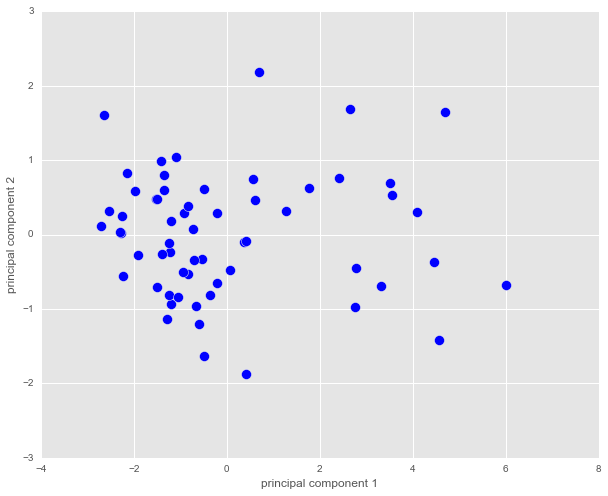

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], s=100)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2');

## What positions are in the underlying dataset?

In [14]:
pca_df['pos'] = list(combine['Pos'])
print pca_df['pos'].value_counts()
pca_df['pos2'] = pca_df['pos'].apply(lambda x: 1 if x =="WR" else 0)

WR    21
CB     9
RB     9
OG     5
SS     4
OT     4
FS     3
C      3
FB     2
Name: pos, dtype: int64


## Let's plot position and PCA1 vs PCA2

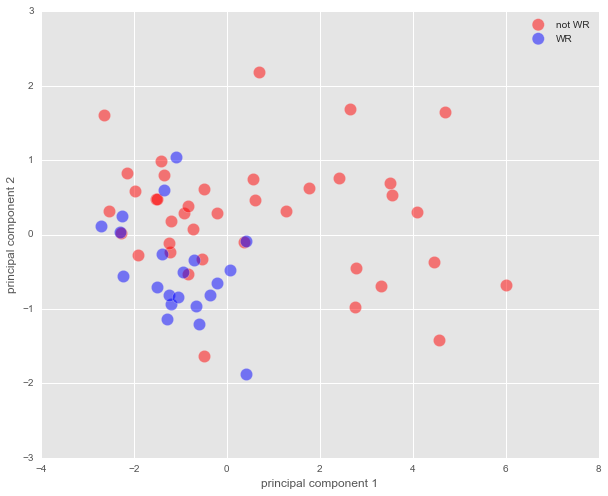

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
colors = ['red', 'blue']
post = ['not WR', 'WR']
for i, col, pos in zip(range(2), colors, post):
    sub = pca_df[pca_df['pos2']==i]
    ax.scatter(sub.iloc[:,0], sub.iloc[:,1], s=150, c=col, label=pos, alpha=0.5)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.legend();

## Let's look at another example... sports-related again..

Let's look at the 2016 Olympic Men's All-Around gymnastics competition.  

The events are floor, pommel horse, rings, parallel bars, vault and the bar.

In [16]:
gym = pd.read_csv("./assets/datasets/gym_men.csv")
gym.head()

,Rank,Athlete,Floor,Pommel,Rings,Vault,Parallel,Bar,Total
0,1,Kohei Uchimura,15.766,14.900,14.733,15.566,15.600,15.800,92.365
1,2,Oleg Verniaiev,15.033,15.533,15.300,15.500,16.100,14.800,92.266
2,3,Max Whitlock,15.200,15.875,14.733,15.133,15.000,14.700,90.641
3,4,David Belyavskiy,15.000,14.766,14.533,15.133,15.933,15.133,90.498
4,5,Lin Chaopan,14.866,14.833,14.733,14.966,15.666,15.166,90.230


In [17]:
gym_n = StandardScaler().fit_transform(gym.iloc[:,2:8])
pca = PCA()
pca.fit(gym_n)
pca.explained_variance_ratio_

array([ 0.5497424 ,  0.22874076,  0.10636906,  0.06562775,  0.03547445,
        0.01404558])

What conclusion can we draw from the explained variance?

## Let's look at those first two PCs

In [18]:
pca1_evec = pca.components_[0]
for weight, event in zip(pca1_evec, gym.iloc[:,2:8].columns):
    print event, weight
print "\n"
pca1_evec = pca.components_[1]
for weight, event in zip(pca1_evec, gym.iloc[:,2:8].columns):
    print event, weight

Floor -0.452410113133
Pommel -0.372178559084
Rings -0.338328232248
Vault -0.376343933789
Parallel -0.456785512988
Bar -0.438240180246


Floor -0.389536525865
Pommel 0.00994264470519
Rings 0.605921193707
Vault 0.533516620226
Parallel -0.0954727985805
Bar -0.432743465027


In [19]:
pca_df = pd.DataFrame(pca.fit_transform(gym_n))
pca_df['rank'] = list(gym['Rank'])
color_scale = StandardScaler().fit_transform(pca_df['rank'])
colors = plt.cm.coolwarm(color_scale)

/Users/pt/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/pt/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


## What can we say about the winner?

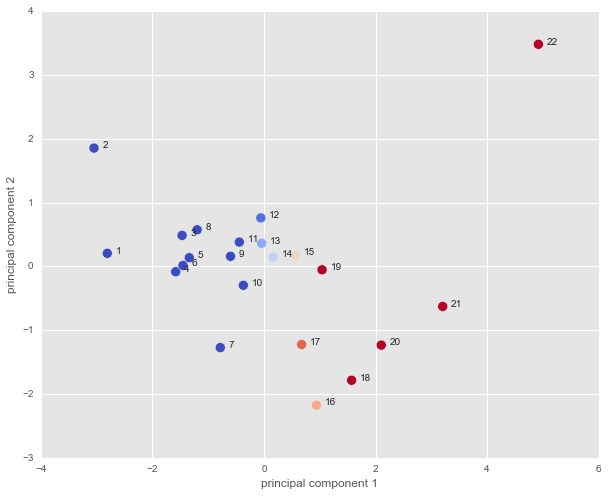

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=colors, s=100)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
for i, gymnast in enumerate(list(gym["Rank"])):
    ax.text(pca_df.iloc[i,0]+0.15,pca_df.iloc[i,1],gymnast);

## Conclusion
We can implement PCA fairly easily using sklearn.
It allows us both to reduce dimensions, but also to uncover the structure of the underlying phenomena.

### Further reading

This is a concise tutorial that walks through the intuition, and includes relevant proofs in its appendix: https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf